This analysis analyzes the gains and losses in percentage of each month from the beginning of the year 2000 to the present day of the Nasdaq Composite IXIC to find the most profitable months of a calendar year. 

Taking the monthly opening and closing prices of IXIC, this analysis assumes a position is opened at the beginning of a month and closed by the end of the same month. 

In [1]:
import math
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("^IXIC.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,4186.189941,4303.149902,3711.090088,3940.350098,3940.350098,33421060000
1,2000-02-01,3961.070068,4698.459961,3911.840088,4696.689941,4696.689941,35644700000
2,2000-03-01,4732.819824,5132.520020,4355.689941,4572.830078,4572.830078,43200490000
3,2000-04-01,4494.890137,4572.839844,3227.040039,3860.659912,3860.659912,35147970000
4,2000-05-01,3930.179932,3982.379883,3042.659912,3400.909912,3400.909912,30831980000
...,...,...,...,...,...,...,...
273,2022-10-01,10659.009766,11230.440430,10088.830078,10988.150391,10988.150391,98292380000
274,2022-11-01,11154.740234,11492.620117,10262.929688,11468.000000,11468.000000,101572370000
275,2022-12-01,11475.169922,11571.639648,10207.469727,10466.480469,10466.480469,100007430000
276,2023-01-01,10562.059570,11223.410156,10265.040039,10852.269531,10852.269531,60804410000


In [3]:
df.drop(277, axis=0, inplace=True)

In [4]:
# defining function to clean and preprocess data
def preproc(x):
    x.drop(["High","Low","Adj Close","Volume"], axis=1, inplace=True)
    x["Change (%)"] = round(((x.Close/x.Open - 1) * 100),2)
    x["Loss/Gain"] = x.Close - x.Open
    x[["year", "month", "day"]] = x["Date"].str.split("-", expand = True)
    x.drop("day", axis=1, inplace=True)
    return x

In [5]:
# applying the function to df
preproc(df)

,Date,Open,Close,Change (%),Loss/Gain,year,month
0,2000-01-01,4186.189941,3940.350098,-5.87,-245.839843,2000,01
1,2000-02-01,3961.070068,4696.689941,18.57,735.619873,2000,02
2,2000-03-01,4732.819824,4572.830078,-3.38,-159.989746,2000,03
3,2000-04-01,4494.890137,3860.659912,-14.11,-634.230225,2000,04
4,2000-05-01,3930.179932,3400.909912,-13.47,-529.270020,2000,05
...,...,...,...,...,...,...,...
272,2022-09-01,11707.440430,10575.620117,-9.67,-1131.820313,2022,09
273,2022-10-01,10659.009766,10988.150391,3.09,329.140625,2022,10
274,2022-11-01,11154.740234,11468.000000,2.81,313.259766,2022,11
275,2022-12-01,11475.169922,10466.480469,-8.79,-1008.689453,2022,12


In [6]:
# grouping change in percentage of prices by month
df2 = df.groupby('month')["Change (%)"].apply(list)
df2

month
01    [-5.87, 12.07, -1.59, -1.93, 2.74, -5.6, 4.03,...
02    [18.57, -22.36, -10.23, 0.96, -2.04, -0.56, -0...
03    [-3.38, -13.45, 5.72, -0.23, -2.1, -2.83, 2.26...
04    [-14.11, 15.31, -7.98, 8.67, -3.82, -4.35, -1....
05    [-13.47, -0.27, -4.04, 9.08, 3.01, 7.54, -6.48...
06    [14.23, 1.38, -9.31, 0.66, 3.5, -0.5, -0.35, -...
07    [-4.65, -6.01, -8.84, 7.28, -7.73, 6.01, -3.97...
08    [11.84, -12.0, -0.58, 4.55, -1.96, -1.8, 4.97,...
09    [-13.62, -16.84, -10.03, -1.7, 3.46, 0.08, 2.9...
10    [-9.28, 13.33, 12.67, 7.52, 3.42, -1.51, 4.86,...
11    [-21.67, 13.2, 11.95, 0.98, 6.14, 5.83, 2.46, ...
12    [-6.56, 1.84, -11.43, 1.54, 3.37, -1.76, -0.64...
Name: Change (%), dtype: object

In [7]:
# store total profitable months of each month into list
month = []
total_profitable_months = []
total_change = []
average_change = []

for m in range(len(df2)):
    profitable = 0
    count = 0
    t = 0
    for c in df2[m]:
        count += 1
        t = t + c
        if c > 0:
            profitable = profitable + 1
    print ("Month: " + (str(m+1)) + " Total Profitable Months: " + str(profitable) + " Sum of changes: " + str(round(t,2)) + " Average change: "+ str(round(t/count,2)))
    month.append(m+1)
    total_profitable_months.append(profitable)
    total_change.append(round(t,2))
    average_change.append(round(t/count,2))

Month: 1 Total Profitable Months: 13 Sum of changes: -1.36 Average change: -0.06
Month: 2 Total Profitable Months: 9 Sum of changes: -12.62 Average change: -0.55
Month: 3 Total Profitable Months: 12 Sum of changes: 8.94 Average change: 0.39
Month: 4 Total Profitable Months: 14 Sum of changes: 34.12 Average change: 1.48
Month: 5 Total Profitable Months: 13 Sum of changes: 5.36 Average change: 0.23
Month: 6 Total Profitable Months: 11 Sum of changes: 5.56 Average change: 0.24
Month: 7 Total Profitable Months: 15 Sum of changes: 34.86 Average change: 1.52
Month: 8 Total Profitable Months: 13 Sum of changes: 6.71 Average change: 0.29
Month: 9 Total Profitable Months: 11 Sum of changes: -49.74 Average change: -2.16
Month: 10 Total Profitable Months: 15 Sum of changes: 46.36 Average change: 2.02
Month: 11 Total Profitable Months: 18 Sum of changes: 36.38 Average change: 1.58
Month: 12 Total Profitable Months: 11 Sum of changes: -10.72 Average change: -0.47


In [8]:
# storing the lists into new dataframe, and converting months to month names

In [9]:
df3 = pd.DataFrame(month, columns=['Month'])

In [10]:
df3['Profitable Months'] = pd.DataFrame(total_profitable_months)
df3['Sum of changes (%)'] = pd.DataFrame(total_change)
df3['Average of changes (%)'] = pd.DataFrame(average_change)

In [11]:
df3['Month'] = df3['Month'].apply(lambda x: calendar.month_abbr[x])
df3

,Month,Profitable Months,Sum of changes (%),Average of changes (%)
0,Jan,13,-1.36,-0.06
1,Feb,9,-12.62,-0.55
2,Mar,12,8.94,0.39
3,Apr,14,34.12,1.48
4,May,13,5.36,0.23
5,Jun,11,5.56,0.24
6,Jul,15,34.86,1.52
7,Aug,13,6.71,0.29
8,Sep,11,-49.74,-2.16
9,Oct,15,46.36,2.02


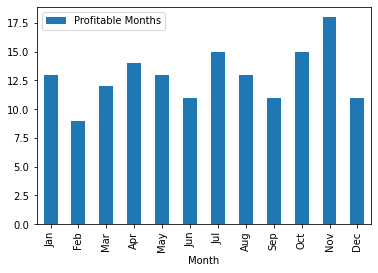

In [14]:
ax = df3.plot.bar(x='Month', y='Profitable Months')

November had the highest number of profitable months, returning a profit 18/23 times. Lets take a look at the changes in percentage of the month November from 2000 till now.

In [185]:
df2.iloc[10]

[-21.67,
 13.2,
 11.95,
 0.98,
 6.14,
 5.83,
 2.46,
 -6.14,
 -10.67,
 4.75,
 -0.88,
 0.5,
 0.76,
 3.24,
 3.41,
 0.85,
 2.38,
 1.71,
 0.04,
 3.96,
 10.79,
 -0.02,
 2.81]

Despite having the most number of profitable months, November has also seen 2 months with significant losses (-21.67% & -10.67%) in 2000 and 2008. These losses were due to the 2000 dot-com bubble burst and 2008 housing market crisis.


September had a total sum of change of almost -50%, and only 11 out of 23 Septembers since the year 2000 returned a profit. That means September is generally a month that performs terribly. This is in fact a real phenomenon known as the September effect. 
https://www.investopedia.com/terms/s/september-effect.asp#:~:text=The%20September%20effect%20refers%20to,going%20back%20nearly%20a%20century.

February has the least number of profitable months, with only 9 in 23 years.

June and December also had only 11 profitable months in 23 years, although June has a positive sum and average of change.

October showed the largest sum and average of change, while November has the highest number of profitable months, perhaps recovering from the losses in September.




In [189]:
x = df.pivot(index='year',columns='month',values='Change (%)')
x

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2000,-5.87,18.57,-3.38,-14.11,-13.47,14.23,-4.65,11.84,-13.62,-9.28,-21.67,-6.56
2001,12.07,-22.36,-13.45,15.31,-0.27,1.38,-6.01,-12.00,-16.84,13.33,13.20,1.84
2002,-1.59,-10.23,5.72,-7.98,-4.04,-9.31,-8.84,-0.58,-10.03,12.67,11.95,-11.43
2003,-1.93,0.96,-0.23,8.67,9.08,0.66,7.28,4.55,-1.70,7.52,0.98,1.54
2004,2.74,-2.04,-2.10,-3.82,3.01,3.50,-7.73,-1.96,3.46,3.42,6.14,3.37
2005,-5.60,-0.56,-2.83,-4.35,7.54,-0.50,6.01,-1.80,0.08,-1.51,5.83,-1.76
2006,4.03,-0.55,2.26,-1.26,-6.48,-0.35,-3.97,4.97,2.91,4.86,2.46,-0.64
2007,1.41,-2.34,1.87,4.11,2.95,-0.41,-2.72,2.28,4.05,5.73,-6.14,-0.10
2008,-9.95,-5.06,0.35,4.61,4.39,-8.82,2.26,1.75,-12.91,-17.07,-10.67,5.41


We can see a largely positive sum of change in October. Lets see if this is related to the losses in September and if October is a recovery month for the losses in September.

In [190]:
# counting number of months with loss in September and profit in October

count = 0
for i in range(len(x)):
    if x['09'][i] < 0:  
        if x['10'][i] > 0:
            count += 1
            
print(count)

8


Of the 12 out of 23 times since 2000 when September returned a loss, a profit was made in October 8 times, with the exceptions being the years 2000, 2008, 2018 and 2020. 

3 out of 4 times this happened could be easily explained. As mentioned before the dot-com bubble burst happened in 2000, the housing crisis in 2008 and the market crash due to the covid-19 pandemic in 2020.

It seems like there's a high possibility that Octobers would do well when the month before performed badly, unless we were in a stock market crash.

In [191]:
# most profitable month ever in % since 2000
highest = df.loc[df["Change (%)"].idxmax()]
highest

Date           2020-04-01
Open               7459.5
Close         8889.549805
Change (%)          19.17
Loss/Gain     1430.049805
year                 2020
month                  04
Name: 243, dtype: object

In [192]:
# biggest loss ever in % since 2000
df.loc[df["Change (%)"].idxmin()]

Date           2001-02-01
Open          2771.570068
Close         2151.830078
Change (%)         -22.36
Loss/Gain      -619.73999
year                 2001
month                  02
Name: 13, dtype: object

In [193]:
# top 10 most profitable months in % since 2000
df.nlargest(10,"Change (%)")

,Date,Open,Close,Change (%),Loss/Gain,year,month
243,2020-04-01,7459.500000,8889.549805,19.17,1430.049805,2020,04
1,2000-02-01,3961.070068,4696.689941,18.57,735.619873,2000,02
15,2001-04-01,1835.219971,2116.239990,15.31,281.020019,2001,04
5,2000-06-01,3471.949951,3966.110107,14.23,494.160156,2000,06
111,2009-04-01,1504.869995,1717.300049,14.12,212.430054,2009,04
21,2001-10-01,1491.449951,1690.199951,13.33,198.750000,2001,10
22,2001-11-01,1705.520020,1930.579956,13.20,225.059936,2001,11
110,2009-03-01,1356.130005,1528.589966,12.72,172.459961,2009,03
33,2002-10-01,1180.260010,1329.750000,12.67,149.489990,2002,10
270,2022-07-01,11006.830078,12390.690430,12.57,1383.860352,2022,07


In [194]:
# top 10 biggest losses in % since 2000
df.nsmallest(10,"Change (%)")

,Date,Open,Close,Change (%),Loss/Gain,year,month
13,2001-02-01,2771.570068,2151.830078,-22.36,-619.739990,2001,02
10,2000-11-01,3316.510010,2597.929932,-21.67,-718.580078,2000,11
105,2008-10-01,2075.100098,1720.949951,-17.07,-354.150147,2008,10
20,2001-09-01,1802.290039,1498.800049,-16.84,-303.489990,2001,09
3,2000-04-01,4494.890137,3860.659912,-14.11,-634.230225,2000,04
8,2000-09-01,4252.149902,3672.820068,-13.62,-579.329834,2000,09
267,2022-04-01,14269.530273,12334.639648,-13.56,-1934.890625,2022,04
4,2000-05-01,3930.179932,3400.909912,-13.47,-529.270020,2000,05
14,2001-03-01,2126.300049,1840.260010,-13.45,-286.040039,2001,03
104,2008-09-01,2402.110107,2091.879883,-12.91,-310.230224,2008,09


Based on these findings, it seems that February, September and December may be the worst months to invest in, while July, October and November looks to be safer bets.